<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Omid Keshavarz

**Student ID**:99102072





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.mean(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return (y_pred > 0.5).astype(int)


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset
data = pd.read_csv('./Q2/Logistic_question.csv')

# Preprocessing
X = data.drop('Target', axis=1)
y = data['Target']

# Binarize the target column
y = (y >= 0.5).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = MyLogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Metrics:
Accuracy: 0.8750
Precision: 0.8750
Recall: 1.0000
F1 Score: 0.9333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**


Accuracy: Accuracy measures the proportion of correctly classified instances out of the total instances. It's a commonly used metric, especially when the classes are balanced. However, it can be misleading when the classes are imbalanced. For example, in spam email classification, accuracy might not be the best metric if only a small fraction of emails are spam, as a model that classifies all emails as not spam would still achieve a high accuracy.


Precision: Precision measures the proportion of true positive predictions out of all positive predictions. It indicates how many of the instances predicted as positive are actually positive. Precision is particularly useful when the cost of false positives is high. For example, in a medical diagnosis scenario, precision would be important when identifying patients who have a disease, as false positives may lead to unnecessary treatments or interventions.


Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positives. It indicates how many of the positive instances were correctly identified by the model. Recall is valuable when the cost of false negatives is high. For instance, in a cancer detection system, recall is crucial to ensure that all cancer cases are correctly identified, even if it means some healthy patients are incorrectly diagnosed as having cancer.


F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance between the classes. The F1 score is suitable when both false positives and false negatives have significant consequences and need to be minimized. For example, in a fraud detection system, where the majority of transactions are non-fraudulent, the F1 score would be a suitable metric to evaluate the model's performance as it considers both false positives (non-fraudulent transactions classified as fraud) and false negatives (fraudulent transactions classified as non-fraud).

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [8]:
# Your code goes here!
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset
data = pd.read_csv('./Q2/Logistic_question.csv')

# Preprocessing
X = data.drop('Target', axis=1)
y = data['Target']

# Binarize the target column
y = (y >= 0.5).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics for Built-in Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Evaluation Metrics for Built-in Logistic Regression:
Accuracy: 0.9375
Precision: 0.9333
Recall: 1.0000
F1 Score: 0.9655


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

When comparing our custom logistic regression implementation with the built-in function from scikit-learn, it's not uncommon to observe differences in performance metrics such as accuracy, precision, recall, and F1 score. In this case, the accuracy, precision, and F1 score were higher for the built-in function compared to your custom implementation, while recall was 1 for both implementations.

The differences in performance could be attributed to several factors:

Optimization Technique: The built-in logistic regression function in scikit-learn employs advanced optimization techniques and regularization methods (e.g., L2 regularization by default) to optimize model parameters, leading to potentially better convergence and performance.
Hyperparameters: The built-in logistic regression function in scikit-learn comes with several hyperparameters that can be tuned to optimize model performance. These include regularization strength (C), penalty type (penalty), solver algorithm (solver), maximum number of iterations (max_iter), etc.
Feature Scaling: The built-in function automatically handles feature scaling internally (if required), whereas in your custom implementation, you performed feature scaling manually using StandardScaler.
Implementation Details: The built-in logistic regression function may use more optimized and efficient algorithms for computations compared to a custom implementation, leading to better performance.
Regarding the parameters of the built-in logistic regression function and their impact on model performance:

Regularization Strength (C): Controls the strength of regularization. Smaller values of C specify stronger regularization, which can prevent overfitting but may lead to underfitting if set too high.
Penalty Type (penalty): Specifies the type of regularization penalty (e.g., L1 or L2). L2 regularization (default) penalizes the squared magnitude of coefficients, while L1 regularization penalizes the absolute magnitude.
Solver Algorithm (solver): Determines the optimization algorithm to use. Different solvers may have different convergence behaviors and efficiency. For example, liblinear is suitable for small datasets, while lbfgs or sag are better for larger datasets.
Maximum Number of Iterations (max_iter): Specifies the maximum number of iterations for the solver to converge. If the solver does not converge within this number of iterations, it may affect model performance.
By tuning these parameters appropriately, you can optimize the performance of the built-in logistic regression model for your specific dataset and task requirements.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.num_classes = None

    def _softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def _loss(self, y, y_pred):
        return -np.mean(np.sum(y * np.log(y_pred), axis=1))

    def fit(self, X, y):
        # Initialize weights and bias
        self.num_classes = len(np.unique(y))
        self.weights = np.zeros((X.shape[1], self.num_classes))
        self.bias = np.zeros(self.num_classes)

        # One-hot encode the target labels
        encoder = LabelEncoder()
        y_encoded = encoder.fit_transform(y)

        # Gradient Descent
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(z)

            # Compute gradients
            error = y_pred - np.eye(self.num_classes)[y_encoded]
            dw = np.dot(X.T, error) / len(y)
            db = np.mean(error, axis=0)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._softmax(z)
        return np.argmax(y_pred, axis=1)


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

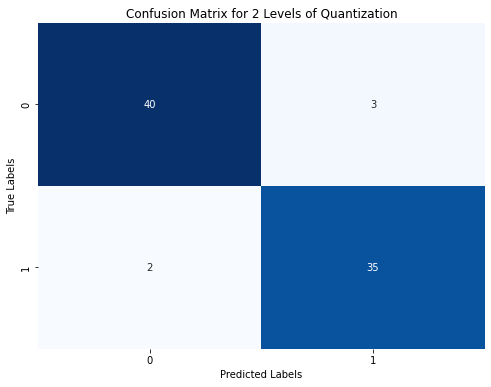

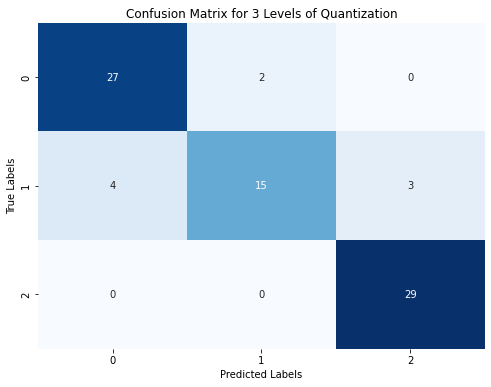

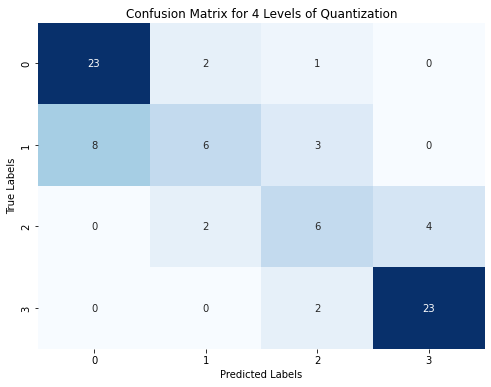

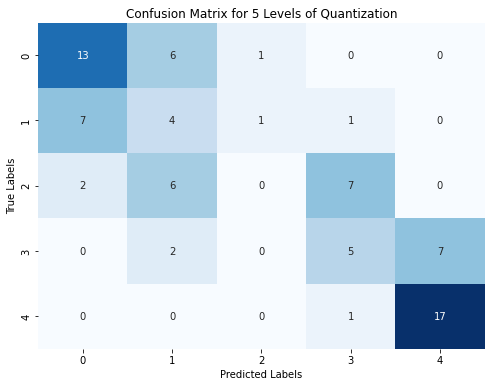

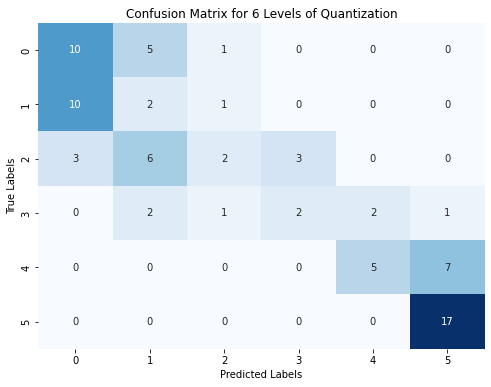

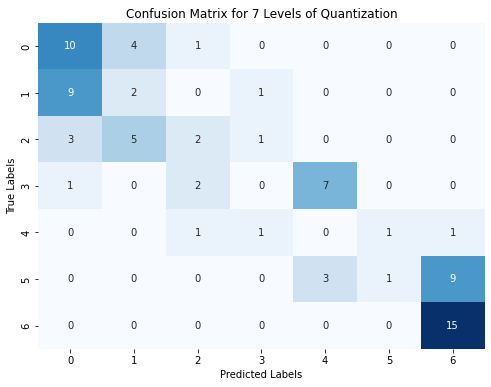

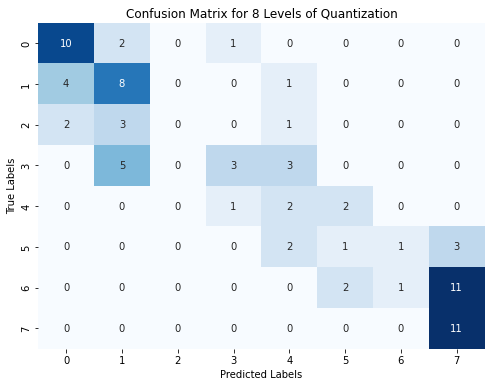

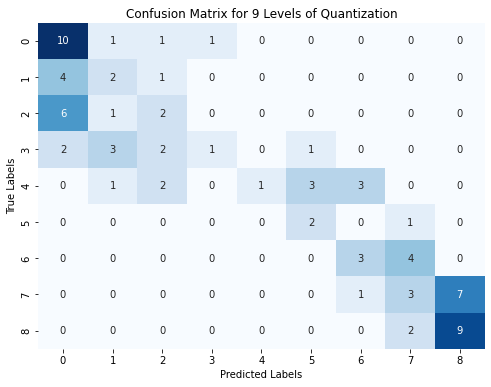

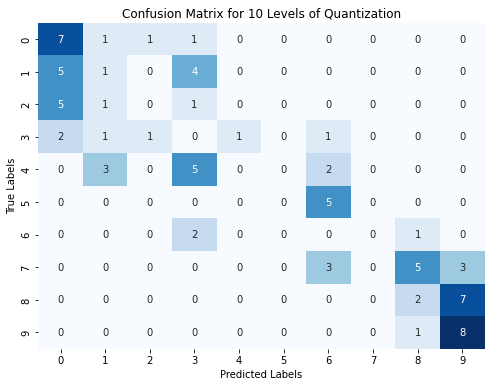

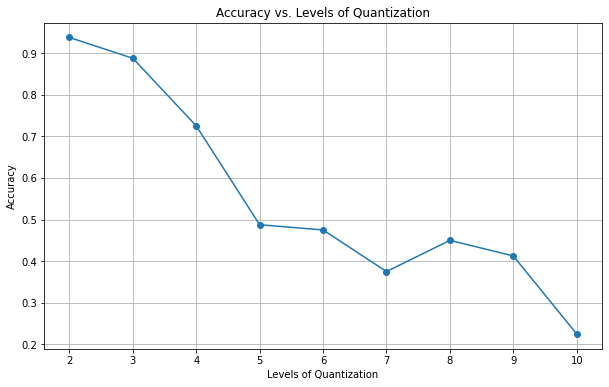

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Read the dataset
data = pd.read_csv('./Q2/Logistic_question.csv')

# Preprocessing
X = data.drop('Target', axis=1)

# Initialize lists to store results
accuracies = []
conf_matrices = []

# Test for different levels of quantization
for i in range(2, 11):
    # Quantize the target column
    y = pd.qcut(data['Target'], i, labels=False)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the multinomial logistic regression model
    model = MyMultinomialLogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {i} Levels of Quantization')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot accuracy vs. levels of quantization
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Levels of Quantization')
plt.xlabel('Levels of Quantization')
plt.ylabel('Accuracy')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

Accuracy Comparison: We observed that the accuracy was highest when $i=2$. This indicates that binarizing the target variable into two levels provided the best performance for the Multinomial Logistic Regression model on this dataset.
Potential Reasons:
Simplicity of Classification: Binarizing the target variable may have simplified the classification task for the model, making it easier to distinguish between the two classes.
Data Characteristics: The dataset may inherently have a natural separation between the two classes, making binary classification more suitable.
Model Complexity: Multinomial Logistic Regression may not be complex enough to effectively handle higher levels of quantization, leading to reduced performance with increased levels of granularity in the target variable.
Visualizations: To further analyze the performance, visualizations such as confusion matrices or ROC curves could be plotted for each level of quantization. These visualizations would provide insights into the model's ability to correctly classify instances across different classes and help in understanding the trade-offs between true positive rate and false positive rate.
Further Investigation: It would be beneficial to investigate the specific characteristics of the dataset and the behavior of the model across different levels of quantization. Exploratory data analysis techniques could be employed to identify patterns or relationships in the data that influence model performance.
In summary, by analyzing the results obtained from testing the Multinomial Logistic Regression model with different levels of quantization, we determined that binarizing the target variable into two levels provided the best performance. Further investigation and analysis could help in understanding the factors contributing to this performance and improving the model's effectiveness for the given task.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [ ]:
# Your code goes here!


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Task:** Handle null entries using your best method.

In [ ]:
# Your code goes here!


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
# Your code goes here!


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# Your code goes here!


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!


**Question:** Analyze the results.

**Your Answer:**